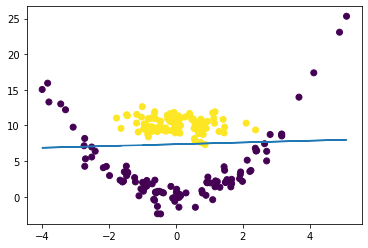

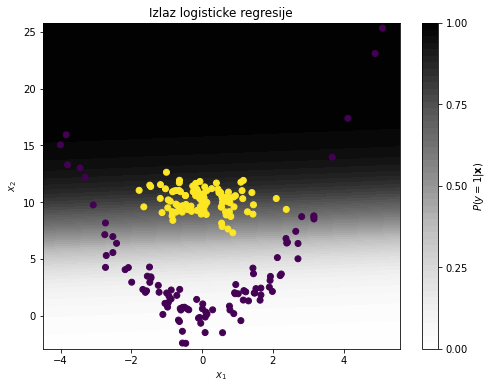

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lin

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data


np.random.seed(242)
skup_ucenje = generate_data(200)

x1_u = skup_ucenje[:,0]
x2_u = skup_ucenje[:,1]
y_u = skup_ucenje[:,2]
x_u = skup_ucenje[:,0:2]

np.random.seed(12)
skup_test = generate_data(100)

x1_t = skup_test[:,0]
x2_t = skup_test[:,1]
y_t = skup_test[:,2]

log = lin.LogisticRegression()
log.fit(x_u,y_u)
log.predict(x_u)
p_1 = log.intercept_
p_2 = log.coef_

plt.figure(0)
plt.scatter(x1_u,x2_u,c=y_u)
x2 = (-log.intercept_ - log.coef_[0][0]*x1_u) / log.coef_[0][1]
plt.plot(x1_u,x2)
plt.show()


f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(skup_ucenje[:,0])-0.5:max(skup_ucenje[:,0])+0.5:.05,
                          min(skup_ucenje[:,1])-0.5:max(skup_ucenje[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = log.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
ax.scatter(x1_u,x2_u,c=y_u)
plt.show()